<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-9/Session-9/Assignment-9/EVA4_Quiz_9_Praveen_Raghuvanshi_Addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
x = datetime.datetime.now()
print(x)

2020-04-05 17:08:11.363385


## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [3]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-9')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/models')

In [5]:
cd '/content/drive/My Drive/eva-4/assignment-9'

/content/drive/My Drive/eva-4/assignment-9


In [6]:
ls

augmentation.py  gradcam/  outputs/      S9_functions.py  utils.py
data/            models/   __pycache__/  sampleimages/


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
from torchvision.utils import make_grid

### 4. Set Device

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from QuizDNN import QuizDNN
from S9_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, getoptimizer

###  6. Load Transformations

In [96]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-c7y99wft
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-c7y99wft
     |████████████████████████████████| 634kB 34.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=d9a13bc4f4684c9e68963a69f8c4401f6bb1934e5bbd7a64dc5d5f57ef79f532
  Stored in directory: /tmp/pip-ephem-wheel-cache-hqq1yprp/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=d2631c3f285d384f3f58cb8644d2f43baaf502ab8b6ce6f69a3926e21e94de8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-hqq1yprp/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albu

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [11]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [12]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog  deer horse  ship


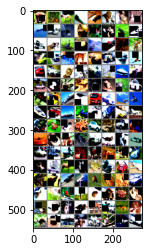

In [13]:
display(4, trainloader, classes)

### 10. Load QuizDNN Model


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QuizDNN(nn.Module):
    def __init__(self):
        super(QuizDNN, self).__init__()
        
        dropout_value = 0.05
        
        # Convolution Block 1
        self.convblock1_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        self.convblock1_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        self.convblock1_3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2)
        self.convblock2_1 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        # Convolution Block 2
        self.convblock2_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        self.convblock2_3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        self.convblock2_4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )

        # TRANSITION BLOCK 2
        self.pool2 = nn.MaxPool2d(2, 2) 
        self.convblock3_1 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 

        # Convolution Block 3
        self.convblock3_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        self.convblock3_3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        self.convblock3_4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        # GAP
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=8)
        )

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
        ) 

    def forward(self, x):
        input = x                                        # Input  - 3x32x32    Output - 16x32x32
        x1 = self.convblock1_1(input)                    # Input  - 16x32x32    Output - 16x32x32
        
        x2 = self.convblock1_2(x1)                       # Input  - 16x32x32   Output - 16x32x32
        
        x1_x2 = x1 + x2                                  # ------ Concat ----- Output - 16x32x32 
        # print(x1_x2.shape)
        x3 = self.convblock1_3(x1_x2)                    # Input  - 16x32x32   Output - 16x32x32
        # print(x3.shape)
        x1_x2_x3 = x1 + x2 + x3                          # ------ Concat ----- Output - 16x32x32 
        # print(x1_x2_x3.shape)
        
        x4 = self.pool1(x1_x2_x3)                       # Input  - 16x32x32   Output - 16x16x16
        # print(x4.shape)
        x4_1 = self.convblock2_1(x4)                    # Input  - 16x16x16   Output - 16x16x16
        # print(x4_1.shape)

        x5 = self.convblock2_2(x4_1)                    # Input  - 16x16x16   Output - 16x16x16
        # print(x5.shape)

        x4_x5 = x4 + x5                                 # ------ Concat ----- Output - 16x16x16
        # print(x4_x5.shape)

        x6 = self.convblock2_3(x4_x5)                   # Input  - 16x16x16   Output - 16x16x16
        # print(x6.shape)

        x4_x5_x6 = x4_x5 + x6                           # ------ Concat ----- Output - 16x16x16
        # print(x4_x5_x6.shape)
        x7 = self.convblock2_4(x4_x5_x6)                # Input  - 16x16x16   Output - 16x16x16
        # print(x7.shape)

        x5_x6_x7 = x5 + x6 + x7                         # ------ Concat ----- Output - 16x16x16
        # print(x5_x6_x7.shape)
        x8 = self.pool2(x5_x6_x7)                       # Input  - 16x16x16   Output - 16x8x8
        # print(x8.shape)
        x8_1 = self.convblock3_1(x8)                    # Input  - 16x8x8     Output - 16x8x8
        # print(x8_1.shape)

        x9 = self.convblock3_2(x8_1)                    # Input  - 16x8x8     Output - 16x8x8
        # print(x9.shape)

        x8_x9 = x8_1 + x9                               # ------ Concat ----- Output - 48x8x8 -> 16 + 32
        x10 = self.convblock3_3(x8_x9)                  # Input  - 48x8x8     Output - 64x8x8
        x8_x9_x10 = x8_x9 + x10      # ------ Concat ----- Output - 112x8x8 -> 48 + 64
        x11 = self.convblock3_4(x8_x9_x10)              # Input  - 112x8x8   Output - 128x8x8

        x12 = self.gap(x11)
        x13 = self.convblock4(x12)                      # Input  - 128x8x8   Output - 10x8x8

        y = x13.view(-1, 10)
        # print(y.shape)
        return F.log_softmax(y, dim=-1)

        '''x1 = x                                          # Input  - 3x32x32    Output - 32x32x32
        print(x1.shape)
        x2 = self.convblock1_1(x1)                      # Input  - 32x32x32   Output - 32x32x32
        print(x2.shape)
        x1_x2 = x1 + x2
        print(x1_x2.shape)

        x1_x2 = torch.cat([x1,x2], dim=1)               # ------ Concat ----- Output - 19x32x32 -> 16 + 3
        # print(x1_x2.shape)
        
        x3 = self.convblock1_2(x1_x2)                   # Input  - 19x32x32   Output - 32x32x32
        x1_x2_x3 = torch.cat([x1_x2, x3], dim=1)        # ------ Concat ----- Output - 51x32x32 -> 19 + 32
        #print(x1_x2_x3.shape)
        
        x4 = self.pool1(x1_x2_x3)                       # Input  - 51x32x32   Output - 51x16x16
        x4_1 = self.convblock2_1(x4)                    # Input  - 51x16x16   Output - 8x16x16

        x5 = self.convblock2_2(x4_1)                    # Input  - 8x16x16   Output - 16x16x16
        x4_x5 = torch.cat([x4_1, x5], dim=1)            # ------ Concat ----- Output - 24x16x16 -> 8 + 16
        x6 = self.convblock2_3(x4_x5)                   # Input  - 24x16x16   Output - 32x16x16
        x4_x5_x6 = torch.cat([x4_x5, x6], dim=1)        # ------ Concat ----- Output - 56x16x16 -> 24 + 32
        x7 = self.convblock2_4(x4_x5_x6)                # Input  - 56x16x16   Output - 64x16x16

        x5_x6_x7 = torch.cat([x5, x6, x7], dim=1)       # ------ Concat ----- Output - 112x16x16 -> 16 + 32 + 64
        x8 = self.pool2(x5_x6_x7)                       # Input  - 112x16x16   Output - 112x8x8
        x8_1 = self.convblock3_1(x8)                    # Input  - 112x8x8     Output - 16x8x8

        x9 = self.convblock3_2(x8_1)                    # Input  - 16x8x8     Output - 32x8x8
        x8_x9 = torch.cat([x8_1, x9], dim=1)            # ------ Concat ----- Output - 48x8x8 -> 16 + 32
        x10 = self.convblock3_3(x8_x9)                  # Input  - 48x8x8     Output - 64x8x8
        x8_x9_x10 = torch.cat([x8_x9, x10], dim=1)      # ------ Concat ----- Output - 112x8x8 -> 48 + 64
        x11 = self.convblock3_4(x8_x9_x10)              # Input  - 112x8x8   Output - 128x8x8

        x12 = self.gap(x11)
        x13 = self.convblock4(x12)                      # Input  - 128x8x8   Output - 10x8x8

        y = x13.view(-1, 10)
        # print(y.shape)
        return F.log_softmax(y, dim=-1)'''


In [15]:
print("Building Model")
net = QuizDNN()

Building Model


In [16]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]           2,304
             ReLU-10           [-1, 16, 32, 32]               0
      BatchNorm2d-11           [-1, 16, 32, 32]              32
          Dropout-12           [-1, 16, 32, 32]               0
        MaxPool2d-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 16,

### 11. Define loss function and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = getoptimizer(net)

### 12. Run Train and Test

In [18]:
for epoch in range(40):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)

print("Training completed")


Epoch: 0
 [================================================================>]  Step: 17ms | Tot: 18s882ms | Train >> Loss: 1.907 | Acc: 28.494% (14247/50000) 391/391 
 [================================================================>]  Step: 5ms | Tot: 2s131ms | Test >> Loss: 1.618 | Acc: 38.660% (3866/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 21ms | Tot: 18s952ms | Train >> Loss: 1.641 | Acc: 39.306% (19653/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 2s179ms | Test >> Loss: 1.421 | Acc: 47.030% (4703/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 21ms | Tot: 19s79ms | Train >> Loss: 1.509 | Acc: 44.776% (22388/50000) 391/391 
 [================================================================>]  Step: 5ms | Tot: 2s182ms | Test >> Loss: 1.388 | Acc: 48.700% (4870/10000) 79/79 

Epoch: 3
 [=============================